In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression

### Analyze

In [3]:
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

# Utility functions from Tutorial
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

C:\Users\Dell\AppData\Local\Temp\ipykernel_20096\1094019903.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [4]:
df1 = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')

df1.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,y
count,3258.000000,3261.000000,3253.000000,3265.000000,3248.000000,3258.000000,3262.000000,3246.000000,3263.000000,3261.000000,3265.000000,3264.000000,3265.000000,3265.000000,3191.000000,3265.000000
mean,6.856292,0.277301,0.336846,69.016309,6.413608,0.045777,0.998058,35.345656,0.502590,0.831760,138.157580,0.994021,3.186873,0.489871,10.524632,5.887289
std,0.857740,0.101863,0.123391,21.432054,5.111197,0.021760,0.079613,16.582364,0.023241,0.305864,42.709637,0.003047,0.150802,0.114568,1.245047,0.885705
min,3.800000,0.080000,0.000000,4.500000,0.600000,0.009000,0.000300,2.000000,0.000300,0.010000,9.000000,0.987220,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,53.500000,1.700000,0.036000,0.995841,23.000000,0.488551,0.630000,107.000000,0.991700,3.080000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,66.500000,5.200000,0.043000,0.996853,34.000000,0.502427,0.780000,133.000000,0.993730,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,83.500000,9.900000,0.050000,0.998098,46.000000,0.515874,0.960000,167.000000,0.996200,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,172.000000,65.800000,0.346000,5.432281,138.500000,0.580925,3.300000,344.000000,1.038980,3.810000,1.080000,14.050000,9.000000


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3265 entries, 0 to 3264
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      3258 non-null   float64
 1   x2      3261 non-null   float64
 2   x3      3253 non-null   float64
 3   x4      3265 non-null   float64
 4   x5      3248 non-null   float64
 5   x6      3258 non-null   float64
 6   x7      3262 non-null   float64
 7   x8      3246 non-null   float64
 8   x9      3263 non-null   float64
 9   x10     3261 non-null   float64
 10  x11     3265 non-null   float64
 11  x12     3264 non-null   float64
 12  x13     3265 non-null   float64
 13  x14     3265 non-null   float64
 14  x15     3191 non-null   float64
 15  y       3265 non-null   int64  
dtypes: float64(15), int64(1)
memory usage: 408.2 KB


#### Check NULL 

In [6]:
df1copy = df1.copy()
print(df1copy.isnull().sum())
print(df2.isnull().sum())


x1      7
x2      4
x3     12
x4      0
x5     17
x6      7
x7      3
x8     19
x9      2
x10     4
x11     0
x12     1
x13     0
x14     0
x15    74
y       0
dtype: int64
x1      7
x2      2
x3     14
x4      0
x5     15
x6      6
x7      6
x8     13
x9      2
x10     4
x11     0
x12     3
x13     0
x14     0
x15    39
dtype: int64


### Handling Missing values

In [7]:
## for train
df1copy= df1copy.dropna(axis= 0, how='any')
print(df1copy.isnull().sum())

## for test
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df2Test=pd.DataFrame(imputer.fit_transform(df2))
df2Test.columns=df2.columns
df2Test.index=df2.index
print(df2Test.isnull().sum())

########### OR ############

x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
y      0
dtype: int64
x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
dtype: int64


In [8]:
XYtrain = df1copy
XYTest = df2Test

### Mutual Information Analyze

c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


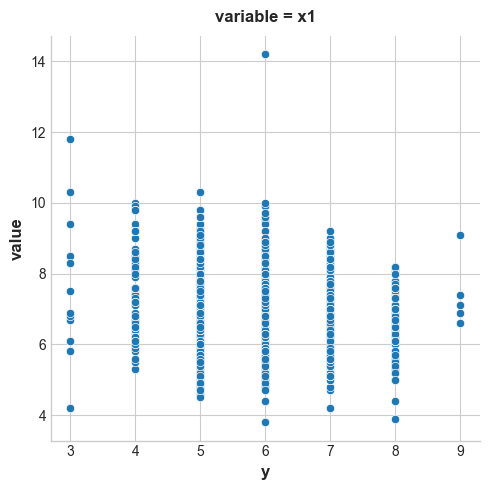

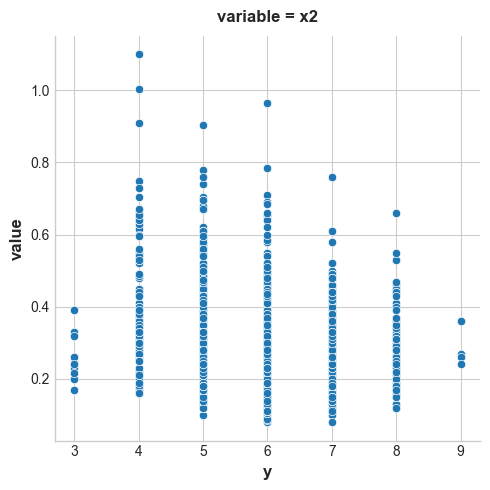

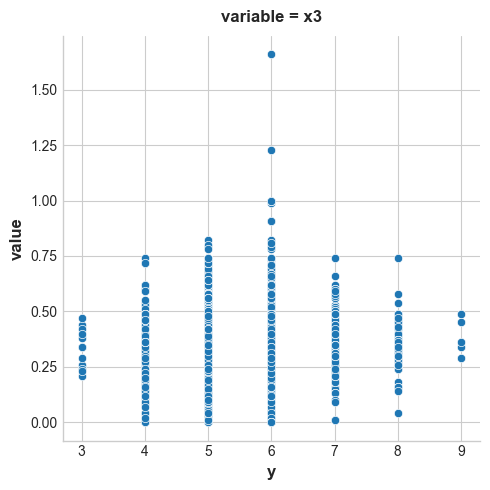

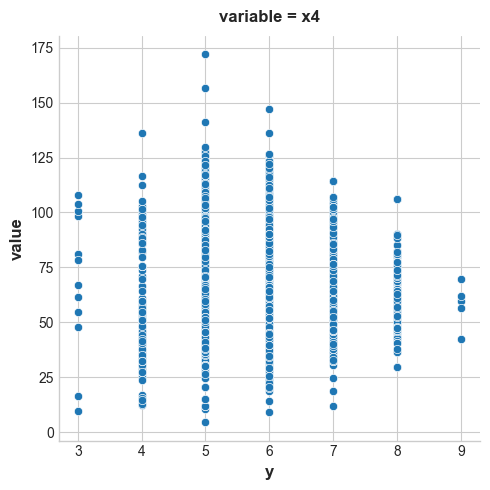

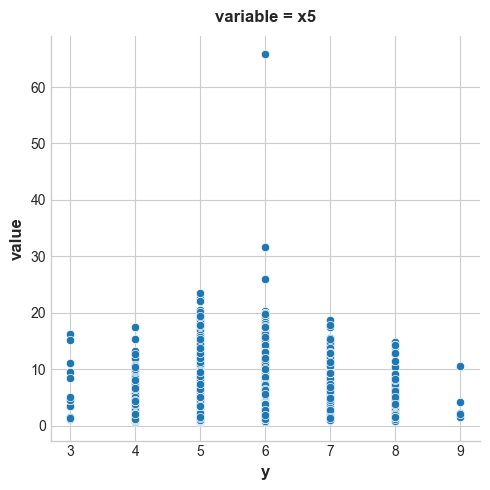

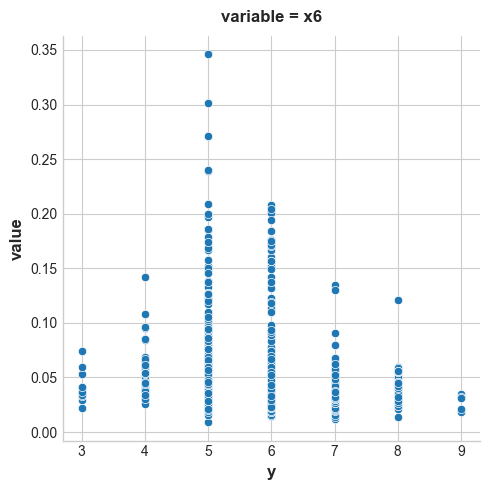

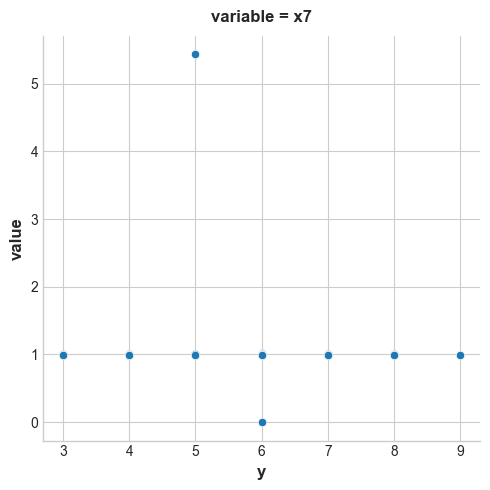

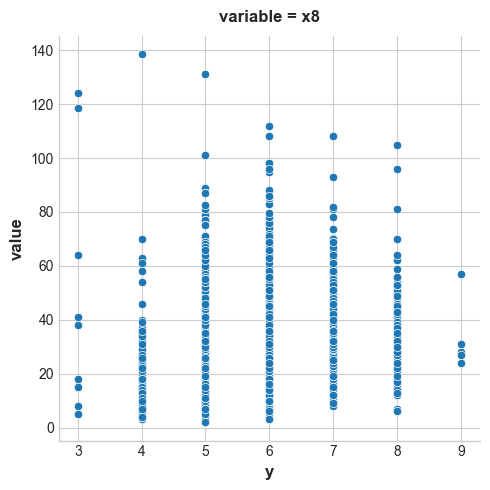

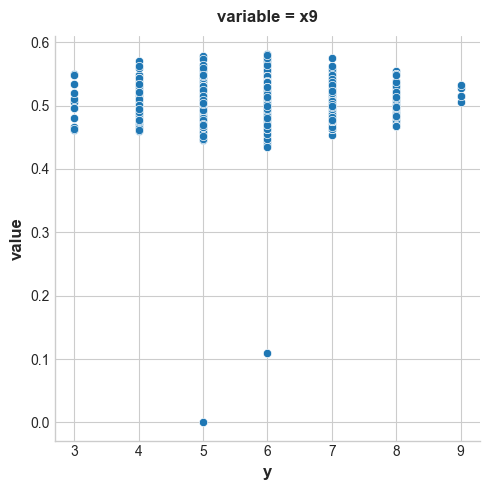

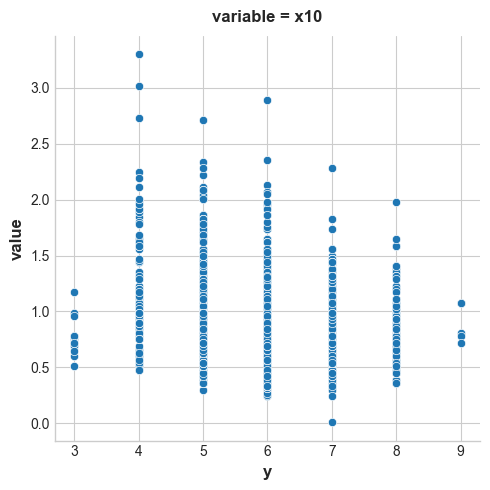

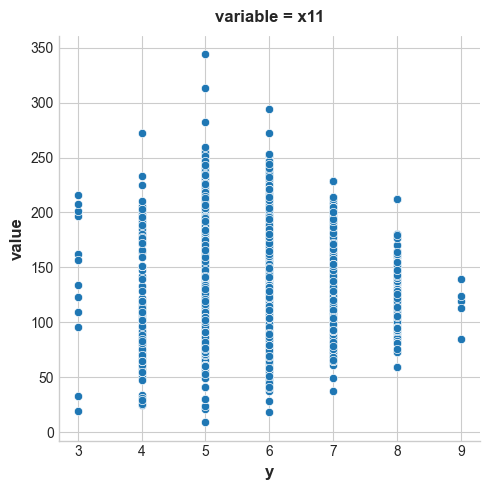

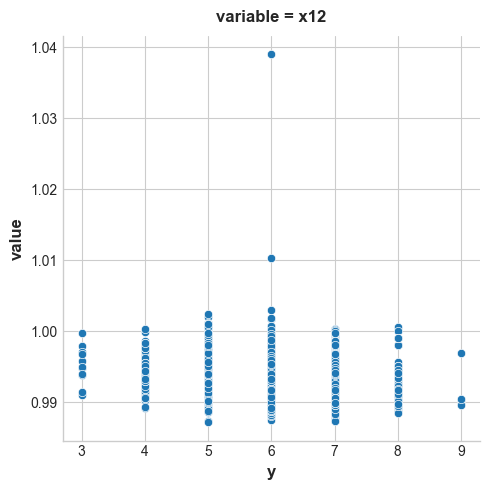

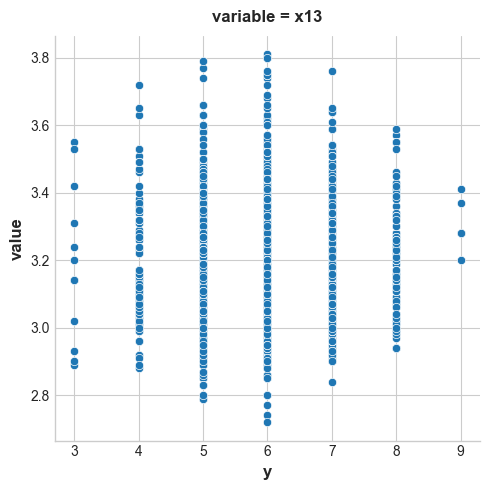

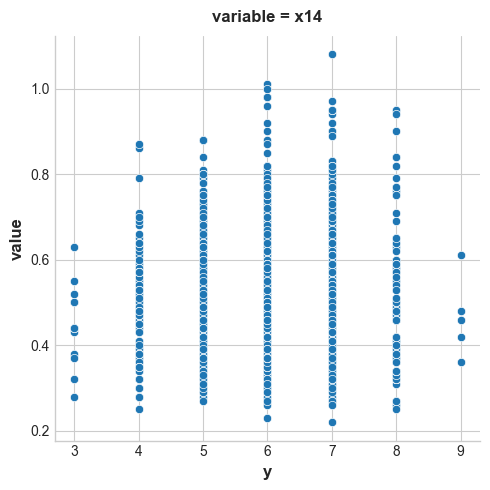

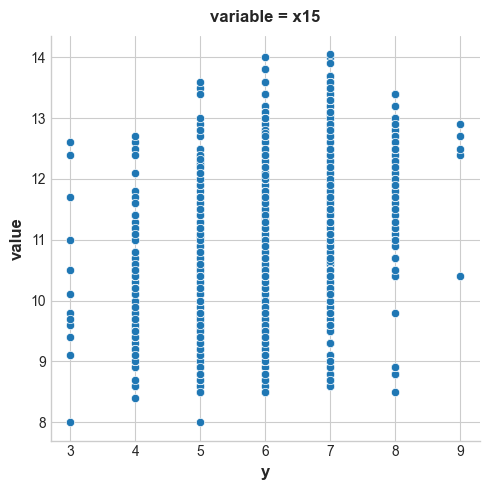

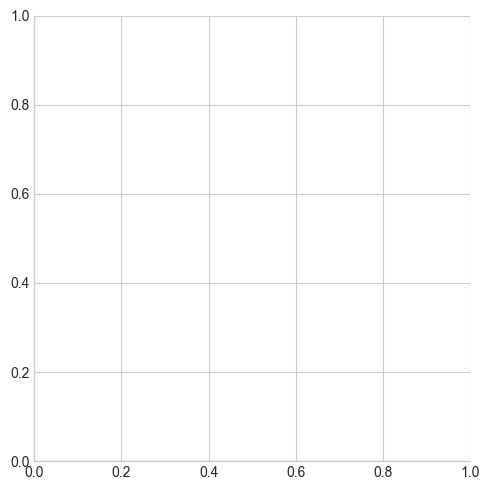

In [9]:
features = df1.columns
for col in features:
    sns.relplot(
x="y", y="value", col="variable", data=df1.melt(id_vars="y", value_vars=col), facet_kws=dict(sharex=False),
);


### Let get MI Score

x15    0.173217
x7     0.162994
x12    0.155068
x4     0.106133
x11    0.099303
x5     0.092474
x6     0.078332
x3     0.067136
x10    0.036268
x8     0.033694
x2     0.031632
x14    0.030773
x13    0.024923
x1     0.021158
x9     0.007058
Name: MI Scores, dtype: float64


c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


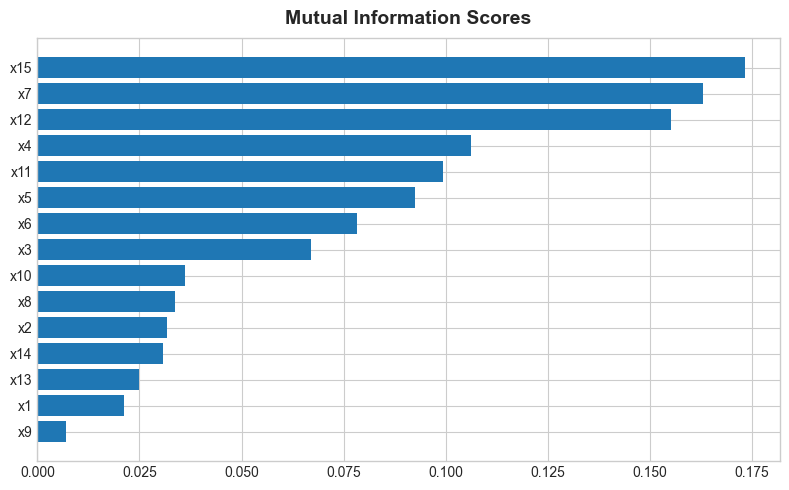

In [10]:
df1_x = XYtrain.drop(columns=["y"])
df1_y = XYtrain["y"]
mi_scores = make_mi_scores(df1_x,df1_y)
print(mi_scores)
# print(mi_scores.tail(20))  # uncomment to see bottom 20

plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)
# plot_mi_scores(mi_scores.tail(20))  # uncomment to see bottom 20

In [11]:
df1_x = df1_x.drop(columns=["x1","x9"])
df2_x = XYTest.drop(columns=["x1","x9"])


In [12]:
df2_x.head()
# df2_y = XYTest["y"]
# df2_y.head()

,x2,x3,x4,x5,x6,x7,x8,x10,x11,x12,x13,x14,x15
0,0.53,0.02,53.5,1.0,0.036,0.996494,39.0,1.59,107.0,0.99300,3.20,0.32,9.0
1,0.34,0.30,84.5,14.9,0.037,0.998489,70.0,1.02,169.0,0.99698,3.25,0.37,10.4
2,0.27,0.29,99.5,3.9,0.059,0.998048,28.0,0.81,199.0,0.99610,3.54,0.59,10.3
3,0.25,0.27,40.5,1.5,0.029,0.994585,37.0,0.75,81.0,0.98920,3.20,0.46,12.2
4,0.30,0.24,60.5,1.2,0.034,0.996644,17.0,0.90,121.0,0.99330,3.13,0.36,9.2


### Feature scaling

In [13]:
### Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

cols = df1_x.columns

df1_x[cols] = sc.fit_transform(df1_x[cols].values)
df2_x[cols] = sc.transform(df2_x[cols].values)




In [14]:
df1_x.head()

,x2,x3,x4,x5,x6,x7,x8,x10,x11,x12,x13,x14,x15
0,0.624043,0.265048,-0.114214,-0.040418,-0.678309,-0.033551,0.403420,0.623944,-0.117412,-1.065712,0.418117,-0.698615,1.577699
1,1.315155,-2.724074,-1.183855,-0.942440,0.784204,-0.029600,0.042733,1.314397,-1.191037,-0.855741,0.550676,1.595854,0.213437
2,-0.165799,-0.300462,-1.067589,-0.354164,-0.861123,-0.032995,-0.378069,-0.165147,-1.074339,-1.036185,-0.244681,-0.963362,1.176446
3,-0.758181,-0.381249,-0.881565,-0.922831,0.052948,-0.023243,-1.159559,-0.756964,-0.887621,-0.517820,0.616956,-0.345620,0.052935
4,-0.461990,-0.785184,-1.207108,-1.079704,-0.678309,-0.042816,-0.378069,-0.461055,-1.214377,-1.557831,-1.901676,-0.963362,1.336947


In [15]:
df2_x.head()

,x2,x3,x4,x5,x6,x7,x8,x10,x11,x12,x13,x14,x15
0,2.499919,-2.562500,-0.718794,-1.060095,-0.449791,-0.019727,0.223076,2.498032,-0.724244,-0.330815,0.086718,-1.492854,-1.231077
1,0.624043,-0.300462,0.722896,1.665581,-0.404088,0.004796,2.086628,0.623944,0.722816,0.974940,0.418117,-1.051610,-0.107566
2,-0.067069,-0.381249,1.420488,-0.491429,0.601390,-0.000622,-0.438184,-0.066510,1.423006,0.686231,2.340230,0.889863,-0.187817
3,-0.264530,-0.542823,-1.323373,-0.962049,-0.769716,-0.043187,0.102847,-0.263783,-1.331075,-1.577516,0.086718,-0.257371,1.336947
4,0.229122,-0.785184,-0.393251,-1.020876,-0.541198,-0.017877,-1.099444,0.229399,-0.397488,-0.232391,-0.377241,-1.139859,-1.070575


In [16]:
# lr = LinearRegression()
# lr.fit(df1_x,df1_y)

In [17]:
# df1_y_p=lr.predict(df1_x)
# mean_squared_error(df1_y,df1_y_p)

In [18]:
# y_pred=lr.predict(df2_x)


In [19]:
# r2_score(df2_y,y_pred)

In [20]:
# mean_squared_error(df2_y,y_pred)

In [21]:
# rmse = np.sqrt(mean_squared_error(df2_y,y_pred))
# rmse

### Save Data frame

In [22]:
df1_x.to_csv("180572D_lab1_train.csv")
df2_x.to_csv("180572D_lab1_test.csv")